In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
BASE = Path().resolve().parent
print(f'BASE: {BASE}')

import torch
torch.manual_seed(0)

IS_MPS_AVAILABLE = torch.backends.mps.is_available() and torch.backends.mps.is_built()
print(f'Is mps avaliable? : {IS_MPS_AVAILABLE}')


import h5py

BASE: /Users/zheng/Documents/Study/SDSSGalCat
Is mps avaliable? : True


In [2]:
# load data
# data ref: https://astronn.readthedocs.io/en/stable/galaxy10sdss.html

hdf = h5py.File(BASE / 'data/Galaxy10.h5', 'r')
hdf.keys()

<KeysViewHDF5 ['ans', 'images']>

In [3]:
ans = hdf['ans']
ans.shape, ans.dtype

((21785,), dtype('uint8'))

In [4]:
imgs = hdf['images']
imgs.shape, imgs.dtype

((21785, 69, 69, 3), dtype('uint8'))

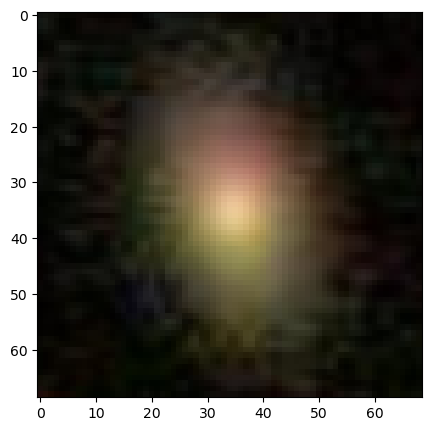

In [5]:
# check the 1st img
img0 = imgs[0 ,: ,: ,:]

fig = plt.figure(figsize=(5, 5))
plt.imshow(img0)
plt.show()
plt.close(fig)

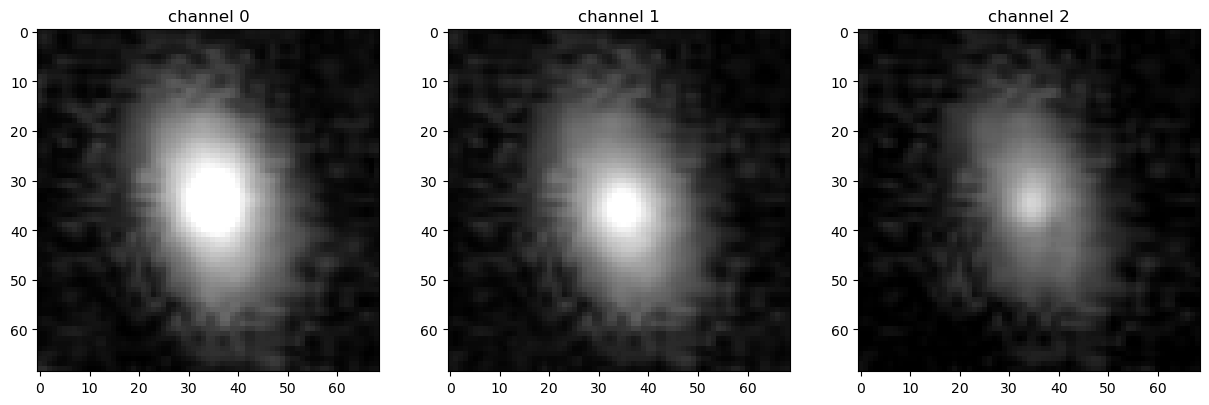

In [6]:
# 3 channels data
img0_channels = [img0[:, :, i] for i in range(3)]
vmin, vmax = np.nanpercentile(img0, (1, 99))
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axs):
    ax.imshow(img0_channels[i], cmap='gray', vmin=vmin, vmax=vmax)
    ax.set_title(f'channel {i}')
plt.show()
plt.close(fig)

In [7]:
'''
Galaxy10 dataset (21785 images)
├── Class 0 (3461 images): Disk, Face-on, No Spiral
├── Class 1 (6997 images): Smooth, Completely round
├── Class 2 (6292 images): Smooth, in-between round
├── Class 3 (394 images): Smooth, Cigar shaped
├── Class 4 (1534 images): Disk, Edge-on, Rounded Bulge
├── Class 5 (17 images): Disk, Edge-on, Boxy Bulge
├── Class 6 (589 images): Disk, Edge-on, No Bulge
├── Class 7 (1121 images): Disk, Face-on, Tight Spiral
├── Class 8 (906 images): Disk, Face-on, Medium Spiral
└── Class 9 (519 images): Disk, Face-on, Loose Spiral
'''
keymap = {
    0: 'Disk, Face-on, No Spiral',
    1: 'Smooth, Completely round',
    2: 'Smooth, in-between round',
    3: 'Smooth, Cigar shaped',
    4: 'Disk, Edge-on, Rounded Bulge',
    5: 'Disk, Edge-on, Boxy Bulge',
    6: 'Disk, Edge-on, No Bulge',
    7: 'Disk, Face-on, Tight Spiral',
    8: 'Disk, Face-on, Medium Spiral',
    9: 'Disk, Face-on, Loose Spiral',
}

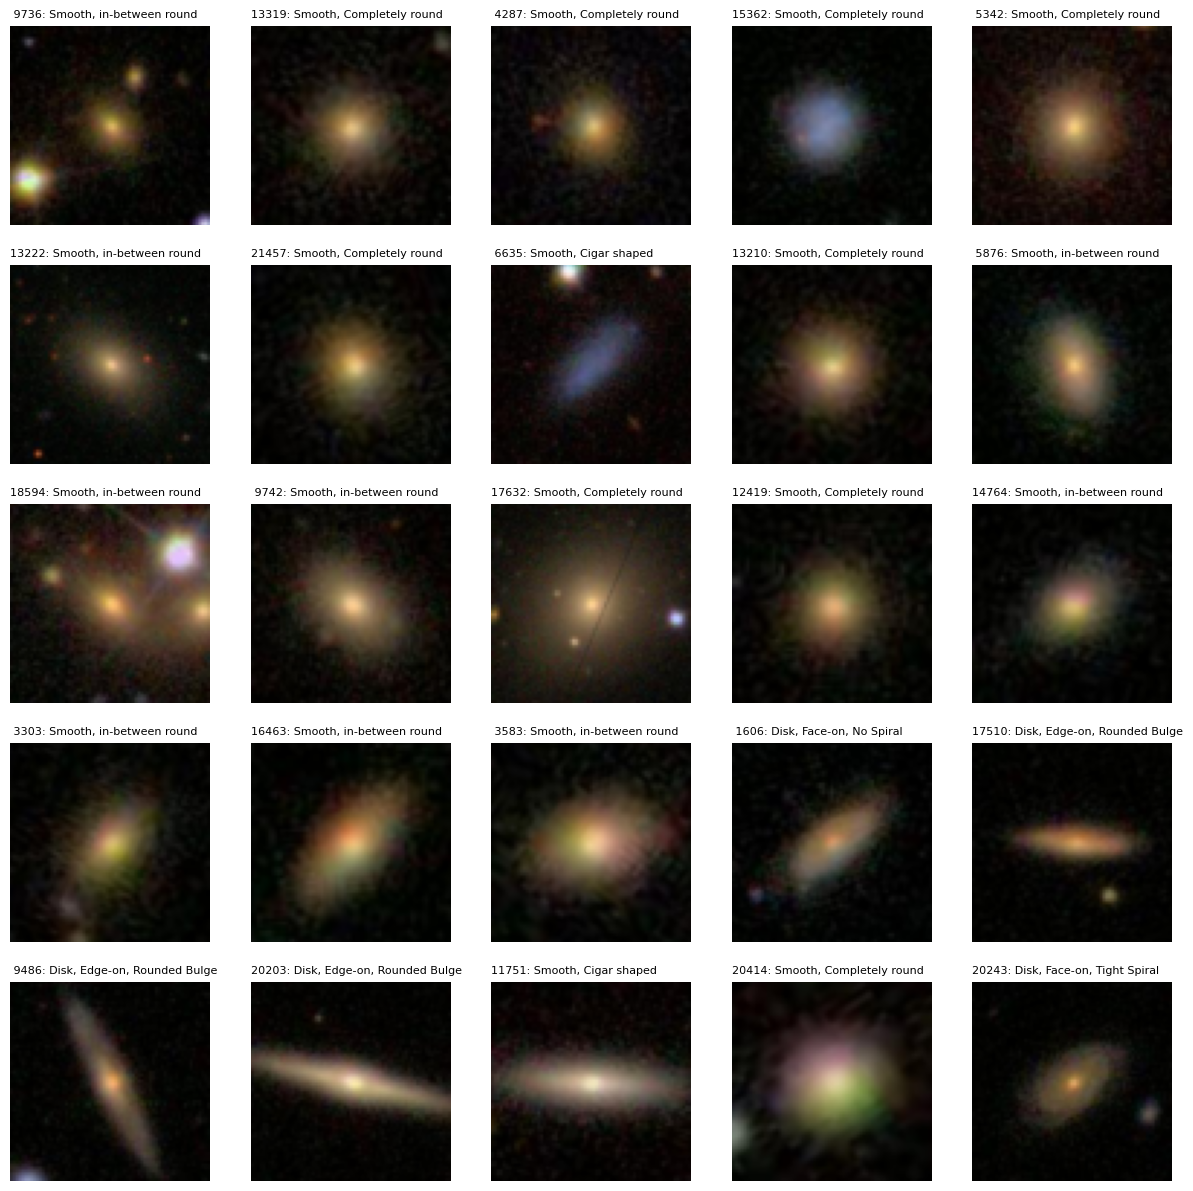

In [8]:
# randomly show 25 imgs, with tag in axes-title
assert imgs.shape[0] == ans.shape[0]
dataset_len = ans.shape[0]

idx_arr = np.random.choice(dataset_len, 25, replace=False)
fig, axes = plt.subplots(5, 5, figsize=(15, 15), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flat):
    idx = idx_arr[i]
    ax.imshow(imgs[idx, :, :, :])
    ax.set_title(f'{idx:5d}: {keymap[ans[idx]]}', fontsize=8, loc='left')
    ax.axis('off')
plt.show()
plt.close(fig)

In [9]:
import os
os.system(f'conda env export > {(BASE / "environment.yml").absolute().as_posix()}')

0